l_list= [8.71477615e+07 1.74293937e+08 2.61440470e+08 3.48587731e+08
 4.35733933e+08 5.22889258e+08 6.10028174e+08 6.97185019e+08
 7.84324444e+08 8.71468093e+08 1.74294113e+09 2.61440467e+09
 3.48589216e+09 4.35736020e+09 5.22885030e+09 6.10024409e+09
 6.97176166e+09 7.84323813e+09 8.71477233e+09 1.74294278e+10
 2.61441551e+10 3.48582907e+10 4.35732917e+10 5.22883232e+10
 6.10031524e+10 6.97182612e+10 7.84331503e+10]


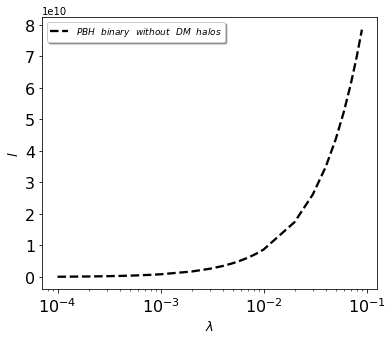

In [75]:
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib.pyplot as plt


π=np.pi
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity


# Repoducing the result of eq.(14) (with λ-values) in research paper "The merger rate of
# primordial-black-hole binaries".
A=(3/(8*G*π*rho_eq))**(1/2)

def Y(a,b):
    return (np.trapz(a,b))


λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
l_1_list=np.zeros(len(λ_1_list))


def Integral(λ_0):    
    def f(u,s,λ_0):
        return  [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_0*((u[0]**2+b**2)**(3/2))))]
    b=λ_0/1000
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,(6*λ_0)/3,1000000)  # not right as the final value of scale factor, s does not corresponds to the 
                                   # radiation domintaion era.
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    s_list=ss.tolist()
    χ=separations**2
    s_telda=ss**2
    integrand=(χ/s_telda)
    y=np.trapz(integrand,s_list)
    Y=A*y
    return Y

for i, λ_0 in enumerate(λ_1_list):
        l_1_list[i] = (Integral(λ_0))
print("l_list=",l_1_list)          
 
    
    

plt.rc('lines', linewidth=2.3)
plt.figure(figsize=(6,5))
plt.xscale("log")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(λ_1_list,l_1_list,'k--')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)
     
plt.show()

L= [5.15496877e+07 1.03098301e+08 1.54650001e+08 2.06194991e+08
 2.57742940e+08 3.09292433e+08 3.60840908e+08 4.12386843e+08
 4.63934510e+08 5.15486202e+08 1.03094409e+09 1.54636122e+09
 2.06179699e+09 2.57715621e+09 3.09252622e+09 3.60787131e+09
 4.12317212e+09 4.63848244e+09 5.15373373e+09 1.03048569e+10
 1.54517433e+10 2.05906148e+10 2.57211166e+10 3.08512967e+10
 3.59834578e+10 4.11157077e+10 4.62455434e+10]


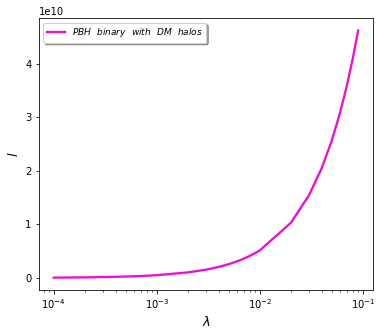

In [76]:
#Solution of eq.(42) with numerical factors using extended mass function in 
# pdf "Tidal forces on the PBH binary". 




A=(3/(8*G*π*rho_eq))**(1/2)
B=(((8*π*G*rho_eq*((t_eq)**6))/3)**(1/4))
M= (1/(1+ (((8*π*G*rho_eq*((t_eq)**2))/3)**(3/4))*(2**(3/4))))   # M=M_NPBH/M_Neq




def M_r_halo(s):    #Mass of the DM halo eq.(38) in pdf "Tidal forces on the PBH binary".
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s)) 

def λ_r(s):
    return ((λ_0)/(n_r(s)))


λ_1_list=[0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
          0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]

L_r=np.zeros(len(λ_1_list))

def integral(λ_0):  
    def f(u,s,λ_0):                                # radiation-domination case
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]   #eq.(32) in 
                                               #reference pdf pdf "Tidal forces on the PBH binary".
    separation0= [1e-12,1]
    b= ((λ_0)/1000)
    ss= np.linspace(1e-12,(6*λ_0)/3,1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    s_list=ss.tolist()
    χ=separations**2
    s_telda=ss**2
    integrand_1=(χ/s_telda)
    integrand_2=(χ/s_list) 
    Y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(42) in pdf "Tidal forces on the PBH binary".
    Z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(42) in pdf "Tidal forces on the PBH binary".
    X=(A*M*Y)+(B*M*Z)
    return X

    
for i, λ_0 in enumerate(λ_1_list):
    L_r[i] = integral(λ_0)
print("L=",L_r)        
 
    
plt.figure(figsize=(6,5))
plt.xscale("log")
plt.plot(λ_1_list,L_r,'#ED0DD9')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.show()

Slope,m= 5.1400e+11
Intercept,b= 6.9270e+06


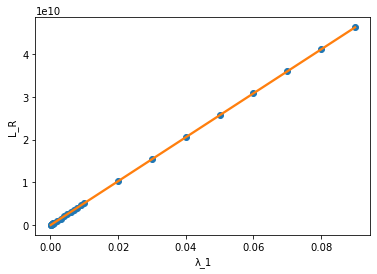

In [77]:
L_R=np.array(L_r)

λ_1=np.array(λ_1_list)



m, b = np.polyfit(λ_1, L_R, 1)


print("Slope,m=",'%0.4e'%m)
print("Intercept,b=",'%0.4e'%b)

plt.plot(λ_1,L_R , 'o')
plt.xlabel('λ_1')
plt.ylabel('L_R')
plt.plot(λ_1, m*λ_1 + b,'')
plt.show()

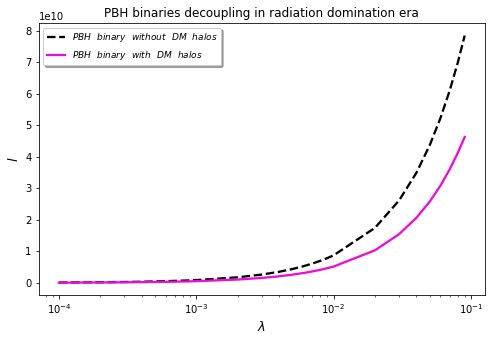

In [78]:
plt.figure(figsize=(8,5))
plt.xscale("log")
plt.plot(λ_1_list,l_1_list,'k--')
plt.plot(λ_1_list,L_r,'#ED0DD9')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.title('PBH binaries decoupling in radiation domination era')
plt.show()

l= [8.34607886e+11 1.26114318e+12 1.69962685e+12 2.14723745e+12
 2.61542172e+12 3.08990087e+12 3.58560200e+12]


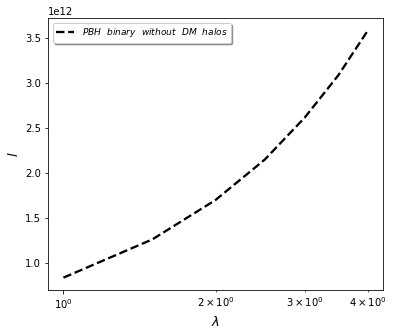

In [79]:
# Solution of eq.(6) in paper "The merger rate of primordial-black-hole 
# binaries".
A=(3/(8*G*π*rho_eq))**(1/2)
def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return (1/((s**4)*h(s)))



def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

   

λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
l_2_list=np.zeros(len(λ_2_list))


    


def integral(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
    integrand=( χ*H_list)
    y=np.trapz(integrand,s_list)
    Y=A*y
    return Y
    
    
for k, λ_0 in enumerate(λ_2_list):
    l_2_list[k] = integral(λ_0)
print("l=",l_2_list)      
 
    
plt.figure(figsize=(6,5))
plt.xscale("log")
plt.plot(λ_2_list,l_2_list,'k--')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.show()   

L= [4.81963677e+11 7.25360896e+11 9.74107249e+11 1.22884634e+12
 1.48956597e+12 1.75683672e+12 2.03024870e+12]


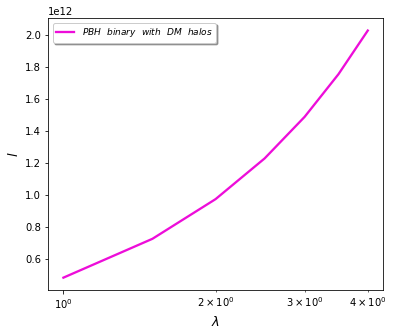

In [80]:
# Solution of eq.(31) with numerical factors  using extended mass function in the 
# pdf "Tidal forces on the PBH binary".


def M_halo(s):              
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)
                                *math.sqrt(s+1))+(4/3))) #eq.(29) in the pdf "Tidal forces on the PBH binary".



def h(s):
    return math.sqrt((s**-3)+(s**-4)) 

def H(s):
    return (1/((s**4)*h(s)))
def I(s):
    return ((math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))*H(s))



def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(s)=h'(s).

def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
                   
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)
   
λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5,4.0]
L_mr=np.zeros(len(λ_2_list))


def Y(λ_0):
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(23) in the pdf "Tidal forces on the PBH binary".

    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((8*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    χ=separations**2
    s_list=ss.tolist()
    H_list=np.zeros(len(s_list))
    I_list=np.zeros(len(s_list))
    for i, s in enumerate(s_list):
        H_list[i] = H(s)
        I_list[i] = I(s)
    integrand_1=(χ*H_list)
    integrand_2=(χ*I_list) 
    y=np.trapz(integrand_1,s_list)     # 1st integral in eq.(31) in pdf "Tidal forces on the PBH binary".
    z=np.trapz(integrand_2,s_list)     # 2nd integral in eq.(31) in pdf "Tidal forces on the PBH binary".
    X=(A*M*y)+(z*B*M)
    return X
    
for i, λ_0 in enumerate(λ_2_list):
    L_mr[i] = Y(λ_0)
print("L=",L_mr) 

    

plt.figure(figsize=(6,5))
plt.xscale("log")
plt.plot(λ_2_list,L_mr,'#ED0DD9')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.show()

Slope,m= 5.1595e+11
Intercept,b= -4.8879e+10


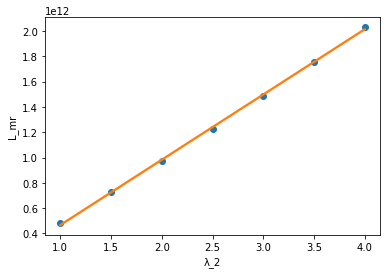

In [81]:
λ_2=np.array(λ_2_list)
L=np.array(L_mr)


m, b = np.polyfit(λ_2, L_mr, 1)


print("Slope,m=",'%0.4e'%m)
print("Intercept,b=",'%0.4e'%b)

plt.plot(λ_2,L_mr , 'o')
plt.xlabel('λ_2')
plt.ylabel('L_mr')
plt.plot(λ_2, m*λ_2 + b,'')
plt.show()

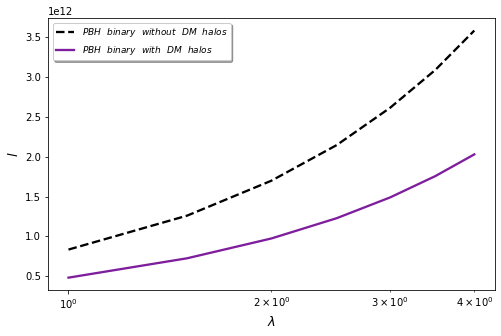

In [82]:
plt.figure(figsize=(8,5))
plt.xscale("log")

plt.plot(λ_2_list,l_2_list,'k--')   
plt.plot(λ_2_list,L_mr,'#7E1E9C')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
           facecolor = 'white',fontsize=14)        
plt.show()

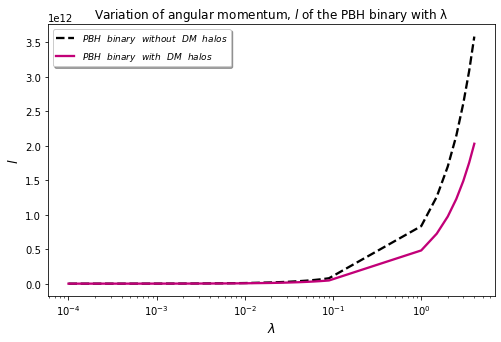

In [83]:
λ_list = λ_1_list+λ_2_list
l = np.append(l_1_list,l_2_list)
L_list=np.append(L_r,L_mr)

plt.figure(figsize=(8,5))
plt.xscale("log")

plt.plot(λ_list,l,'k--')
plt.plot(λ_list ,L_list,'#C20078')
plt.xlabel('$λ$',fontsize=13)
plt.ylabel('$l$',fontsize=13)
plt.legend(['$PBH\hspace{0.7} binary\hspace{0.7} without\hspace{0.7} DM\hspace{0.7} halos$','$PBH\hspace{0.7} binary\hspace{0.7} with\hspace{0.7} DM\hspace{0.7} halos$'],prop = {'size' :9},
              loc='upper left',shadow = True,
               facecolor = 'white',fontsize=14)        

plt.title('Variation of angular momentum, $l$ of the PBH binary with λ')
plt.show()